In [5]:
import sys  
sys.path.insert(1, '..')
sys.path.insert(2, '../modules/')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from glob import glob
from datetime import timedelta
from modules import convert_datetime
import dataconfig

In [6]:
merged_df_list = []
glob_str = f'{dataconfig.DATA_DIR_ZERO_CROSS}/*zero_cross_df.pickle'
for file in glob(glob_str):
    input_data = pickle.load(open(file, 'rb'))

    merged_df_list.append(input_data)

merged_zerocross_df = pd.concat(merged_df_list)

In [35]:
hek_flares = pickle.load(open(f'{dataconfig.DATA_DIR_PRODUCTS}/hek_flare_db.pickle', 'rb'))


In [40]:
hek_flares.columns

Index(['event_date', 'start_time', 'peak_time', 'end_time', 'goes_class',
       'goes_letter', 'goes_number', 'AR_num', 'hgs_x', 'hgs_y',
       'hgs_bbox_poly', 'hgc_x', 'hgc_y', 'hgc_bbox_poly', 'hpc_x', 'hpc_y',
       'hpc_bbox_poly', 'event_type', 'telescope_used', 'id_institute',
       'id_team', 'search_instrument', 'search_channel', 'noposition'],
      dtype='object')

In [85]:
hek_flares[hek_flares.goes_letter >= 'C'].id_team.value_counts()

SolarSoft    9038
SWPC         8376
SEC            26
Annotator       4
Name: id_team, dtype: int64

In [90]:
ss_flares = hek_flares[(hek_flares.id_team =='SolarSoft') & (hek_flares.goes_letter >= 'C')]
ss_flares.goes_letter.value_counts()

C    8198
M     788
X      52
Name: goes_letter, dtype: int64

In [91]:
ss_flares[ss_flares.duplicated(subset='peak_time')].goes_letter.value_counts()

C    582
M     72
X      2
Name: goes_letter, dtype: int64

In [95]:
test_time = ss_flares[ss_flares.duplicated(subset='peak_time')].iloc[392].peak_time

ss_flares[ss_flares.peak_time == test_time].iloc[1].compare(ss_flares[ss_flares.peak_time == test_time].iloc[0])

,self,other
start_time,2014-06-28 01:49:00+00:00,2014-06-28 01:48:00+00:00
end_time,2014-06-28 02:14:00+00:00,2014-06-28 02:58:00+00:00
hgc_x,-89.58276,-89.57357
hgc_bbox_poly,"[[0.41724, 1.0], [0.41724, 1.0], [0.41724, 1.0...","[[0.42643, 1.0], [0.42643, 1.0], [0.42643, 1.0..."
hpc_bbox_poly,"[[16.5366, -25.06308], [16.5366, -25.06308], [...","[[16.5366, -25.06176], [16.5366, -25.06176], [..."


In [73]:
g_flares = hek_flares[(hek_flares.id_team =='SWPC') & (hek_flares.goes_letter >= 'C')]
g_flares.goes_letter.value_counts()

C    7603
M     724
X      49
Name: goes_letter, dtype: int64

In [78]:
g_flares[g_flares.duplicated(subset='peak_time')].goes_letter.value_counts()

C    18
M     5
Name: goes_letter, dtype: int64

In [77]:
g_flares[g_flares.duplicated(subset='peak_time')].goes_letter.value_counts()

test_time2 = g_flares[g_flares.duplicated(subset='peak_time')].iloc[2].peak_time

g_flares[g_flares.peak_time == test_time2].iloc[1].compare(g_flares[g_flares.peak_time == test_time2].iloc[0])

,self,other
start_time,2012-09-29 07:50:00+00:00,2012-09-29 06:17:00+00:00
end_time,2012-09-29 07:56:00+00:00,2012-09-29 07:59:00+00:00
AR_num,11577.0,11575.0
hgs_x,66.0,45.0
hgs_y,9.0,6.0
hgs_bbox_poly,"[[65.5, 8.5], [66.5, 8.5], [66.5, 9.5], [65.5,...","[[44.5, 5.5], [45.5, 5.5], [45.5, 6.5], [44.5,..."
hgc_x,-172.09776,167.7545
hgc_y,9.0,6.0
hgc_bbox_poly,"[[-172.59776, 8.5], [-171.59776, 8.5], [-171.5...","[[167.2545, 5.5], [168.2545, 5.5], [168.2545, ..."
hpc_x,865.566,675.516


In [ ]:
ss_flares = hek_flares[(hek_flares.id_team =='SolarSoft') & (hek_flares.goes_letter >= 'C')]
ss_flares.goes_letter.value_counts()

In [8]:
flare_class_dict_query = {'A': 1e-8, 'B': 1e-7, 'C': 1e-6, 'M': 1e-5, 'X': 1e-4}
teams = {'ALEXIS': 1, 'SWPC': 2, 'SolarSoft':4}  
# tuples are (ALEXIS, SWPC, solar_soft)    
id_dict = {'7':(1,1,1), '6': (0,1,1), '5': (1,0,1),'4': (0,0,1),'3': (1,1,0),'2': (0,1,0),'1': (1,0,0)}

In [9]:
goes_flares = hek_flares[(hek_flares['id_team'] == 'SWPC')& (hek_flares['goes_class'] > 'C')].reset_index(drop= True)

solarsoft_flares = hek_flares[(hek_flares['id_team'] == 'SolarSoft') & (hek_flares['goes_class'] > 'C')].reset_index(drop= True)

zero_cross = merged_zerocross_df[(merged_zerocross_df['resampled_value'] > flare_class_dict_query['C'])].reset_index(drop= True)


In [22]:
solarsoft_flares

,peak_time,id_team
0,2010-05-01 01:39:00+00:00,SolarSoft
1,2010-05-04 16:29:00+00:00,SolarSoft
2,2010-05-05 07:16:00+00:00,SolarSoft
3,2010-05-05 11:52:00+00:00,SolarSoft
4,2010-05-05 17:19:00+00:00,SolarSoft
...,...,...
9033,2020-11-28 23:18:00+00:00,SolarSoft
9034,2020-11-29 01:16:00+00:00,SolarSoft
9035,2020-11-29 01:16:00+00:00,SolarSoft
9036,2020-11-29 11:44:00+00:00,SolarSoft


In [10]:
#define our zero crossing df

our_flares = zero_cross[['zerocross_date_time']]

our_flares['id_team'] = 'ALEXIS'

only_duplicated_zero = our_flares[(our_flares.duplicated())]

zero_flares = our_flares.rename(columns = {'zerocross_date_time': 'peak_time'})

<ipython-input-10-531287107d90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_flares['id_team'] = 'ALEXIS'


In [11]:

# define SWPC Flares

goes_flares = pd.DataFrame(goes_flares.peak_time, columns = ['peak_time'])

goes_flares['id_team'] = 'SWPC'

In [12]:
# define solarsoft flares

solarsoft_flares = pd.DataFrame(solarsoft_flares.peak_time, columns = ['peak_time'])

solarsoft_flares['id_team'] = 'SolarSoft'


In [13]:
all_flares_not_masked = pd.concat([zero_flares , goes_flares,  solarsoft_flares], ignore_index=True)

date_limit_low, date_limit_high = pd.Timestamp('2010/5/1T00:00:00', tz = 'utc'),pd.Timestamp('2020/3/4T00:00:00', tz = 'utc')

all_flares = all_flares_not_masked[(all_flares_not_masked.peak_time >= date_limit_low) & (all_flares_not_masked.peak_time <= date_limit_high)].sort_values(by = 'peak_time').reset_index(drop = True)

In [14]:
minutes_per_agg = 10

j = 0 # grab first datetime in the list
flares_list = [] # keep track of info from loop

while j < len(all_flares.peak_time):
    
    datetime = all_flares.peak_time.iloc[j] # grab j-th datetime
        
    fwd = datetime + timedelta(minutes = minutes_per_agg) # choose fwd time range
     
    mask = all_flares[(all_flares.peak_time < fwd) & (all_flares.peak_time >= datetime)] # return df with all entries from current datetime to fwd time
    
    this_flare_datetime_list = []
    
    this_flare_identification = []
    
    for group in teams: 
        
        group_mask = mask[(mask.id_team) == group] #filter for all elements of mask that are returned by each individual group
        
        number_of_entries = len(group_mask)
        
        if number_of_entries != 0:
        
            mean_datetime = np.mean(group_mask.peak_time)
            
            this_flare_datetime_list.append({'datetime': mean_datetime})
            
            this_flare_identification.append(teams[group])
                   
        
    sum_of_ids = np.sum(this_flare_identification)
    
    flare_id_tuple = id_dict[str(sum_of_ids)]
    
    datetime_df = pd.DataFrame(this_flare_datetime_list)
    
    merged_datetime = np.mean(datetime_df.datetime)
            
    flares_list.append({'merged_datetime': merged_datetime,
                        'id_tuple': flare_id_tuple})
    
    k = len(mask) # go k amount fwd in the list of datetimes

    j = j + k

In [15]:
flare_list_df = pd.DataFrame(flares_list)
flare_list_df

,merged_datetime,id_tuple
0,2010-05-01 01:39:00.046000128+00:00,"(1, 1, 1)"
1,2010-05-04 16:29:20.046000128+00:00,"(1, 1, 1)"
2,2010-05-05 07:15:40.046000128+00:00,"(1, 1, 1)"
3,2010-05-05 11:52:40.046000128+00:00,"(1, 1, 1)"
4,2010-05-05 17:19:40.046000128+00:00,"(1, 1, 1)"
...,...,...
38662,2019-05-07 10:47:39.833166592+00:00,"(1, 1, 1)"
38663,2019-05-07 11:26:59.499500032+00:00,"(1, 0, 0)"
38664,2019-05-07 11:56:19.833166592+00:00,"(1, 1, 1)"
38665,2019-05-09 05:50:59.833166592+00:00,"(1, 1, 1)"


In [16]:
plot_this = []
for name,group in pd.DataFrame(flares_list).groupby('id_tuple'):
    
    plot_this.append({'id_tuple': name, 
                     'counts': len(group)})

In [17]:
stat_df = pd.DataFrame(plot_this)

stat_df


,id_tuple,counts
0,"(0, 0, 1)",60
1,"(0, 1, 0)",36
2,"(0, 1, 1)",268
3,"(1, 0, 0)",29982
4,"(1, 0, 1)",378
5,"(1, 1, 0)",555
6,"(1, 1, 1)",7388


In [21]:
np.sum(stat_df.counts) - np.sum([55,57,248,30028,337,1788,6153])

1

38666

-0.4
0.6
1.6
2.6
3.6
4.6
5.6


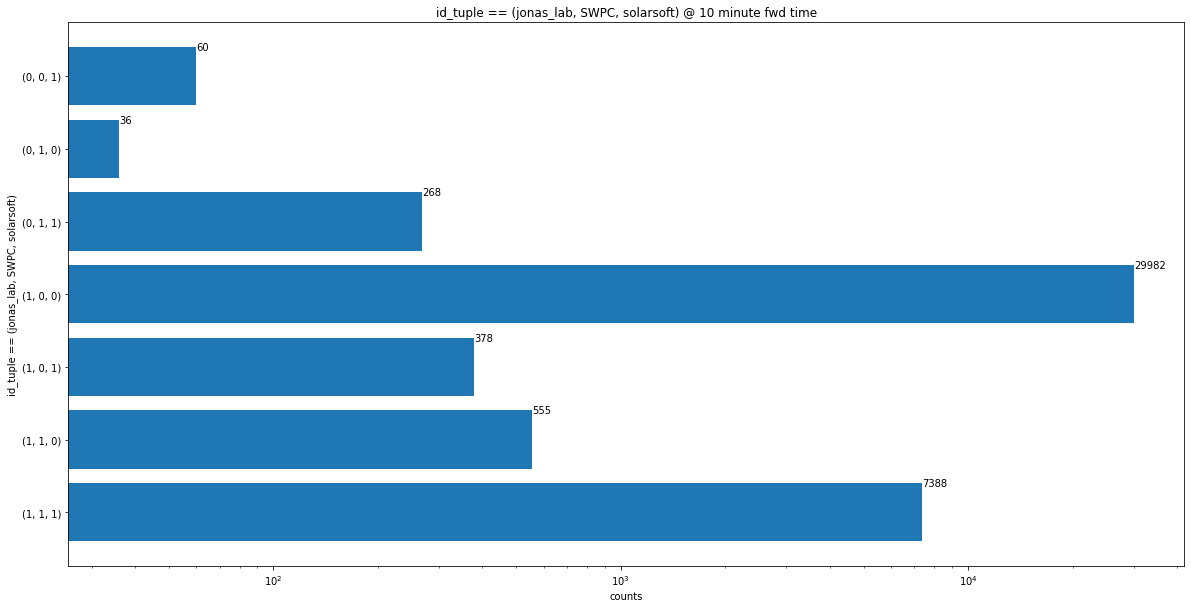

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)


# Example data
id_tuple = stat_df.id_tuple.to_list()
y_pos = np.arange(len(id_tuple))
counts = stat_df.counts.to_list()
# error = np.random.rand(len(people))



hbars = ax.barh(y_pos, counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(id_tuple)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('counts')
ax.set_ylabel('id_tuple == (jonas_lab, SWPC, solarsoft)')
ax.set_title('id_tuple == (jonas_lab, SWPC, solarsoft) @ {} minute fwd time'.format(minutes_per_agg))

for bar in hbars:
    print(bar.get_y())
    ax.text(bar.get_width(), bar.get_y(), s = bar.get_width(), va = 'center')

ax.set_xscale('log')